In [1]:
%matplotlib inline


# DBSCAN Clustering



In [11]:
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
#print(iris.DESCR)
X = iris.data
y = iris.target
print(X.shape)
print(y.shape)

(150, 4)
(150,)


<IPython.core.display.Javascript object>


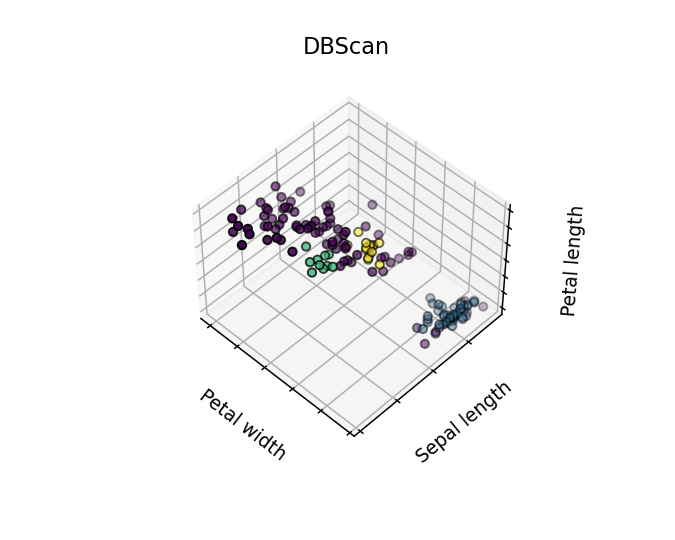

[ 0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1  0  0  0  0  0  0 -1  0
  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1 -1  1  2 -1 -1  1 -1 -1  2 -1 -1 -1  1  2  2 -1 -1 -1 -1
 -1 -1 -1  1  1  1 -1 -1 -1 -1  2 -1 -1 -1  1 -1  2  2  2 -1  2 -1  2  2
  2 -1 -1  2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1]
[ 0  1  2  3  4  7  9 10 11 12 17 19 21 26 27 28 29 30 31 34 35 37 39 40
 45 46 47 48 49 86 94 96 99]


In [45]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
%matplotlib notebook
from sklearn.cluster import DBSCAN

estimators = [('DBScan_iris', DBSCAN(eps=0.4, min_samples=10))]
fignum = 1
titles = ['DBScan']

for name, est in estimators:
    fig = plt.figure(fignum, figsize=(5, 4))
    ax = plt.axes(projection='3d', elev=48, azim=134)
    est.fit(X)
    labels = est.labels_
    print(labels)
    print(est.core_sample_indices_)
    
    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1
    fig.show()

In [46]:
from sklearn import metrics
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: ", n_clusters_)
print("Estimated number of noise points:", n_noise_)
print("Homogeneity: ", metrics.homogeneity_score(y, labels))
print("Completeness: ", metrics.completeness_score(y, labels))
print("V-measure: ", metrics.v_measure_score(y, labels))
print("Adjusted Rand Index: ", metrics.adjusted_rand_score(y, labels))
print("Adjusted Mutual Information: ", metrics.adjusted_mutual_info_score(y, labels,
                                           average_method='arithmetic'))
print("Silhouette Coefficient: ", metrics.silhouette_score(X, labels))


Estimated number of clusters:  3
Estimated number of noise points: 83
Homogeneity:  0.5665776500351133
Completeness:  0.5764948887809247
V-measure:  0.5714932486805491
Adjusted Rand Index:  0.45693981927345817
Adjusted Mutual Information:  0.5629790488693637
Silhouette Coefficient:  0.1214029331288172


In [14]:
help(DBSCAN)

Help on class DBSCAN in module sklearn.cluster.dbscan_:

class DBSCAN(sklearn.base.BaseEstimator, sklearn.base.ClusterMixin)
 |  DBSCAN(eps=0.5, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)
 |  
 |  Perform DBSCAN clustering from vector array or distance matrix.
 |  
 |  DBSCAN - Density-Based Spatial Clustering of Applications with Noise.
 |  Finds core samples of high density and expands clusters from them.
 |  Good for data which contains clusters of similar density.
 |  
 |  Read more in the :ref:`User Guide <dbscan>`.
 |  
 |  Parameters
 |  ----------
 |  eps : float, optional
 |      The maximum distance between two samples for one to be considered
 |      as in the neighborhood of the other. This is not a maximum bound
 |      on the distances of points within a cluster. This is the most
 |      important DBSCAN parameter to choose appropriately for your data set
 |      and distance function.
 |  
 |  min_samples :